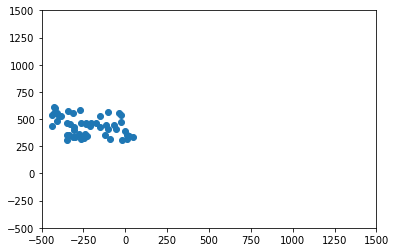

In [12]:
"""
A deliberately bad implementation of 
[Boids](http://dl.acm.org/citation.cfm?doid=37401.37406)
for use as an exercise on refactoring.
"""

from matplotlib import pyplot as plt
from matplotlib import animation

import random

# Deliberately terrible code for teaching purposes

#for x in range(50):
#    boids_x=[random.uniform(-450,50.0)] #sort out numbers with constants?
#    boids_y=[random.uniform(300.0,600.0)]
#    boid_x_velocities=[random.uniform(0,10.0)]
  #  boid_y_velocities=[random.uniform(-20.0,20.0)]

boids_x=[random.uniform(-450,50.0) for x in range(50)]
boids_y=[random.uniform(300.0,600.0) for x in range(50)]
boid_x_velocities=[random.uniform(0,10.0) for x in range(50)]
boid_y_velocities=[random.uniform(-20.0,20.0) for x in range(50)]
boids=(boids_x,boids_y,boid_x_velocities,boid_y_velocities)

boids=(boids_x,boids_y,boid_x_velocities,boid_y_velocities)

def update_boids(boids):
    xs,ys,xvs,yvs=boids
    
    # Fly towards the middle
    for i in range(len(xs)):
        for j in range(len(xs)):
            xvs[i]=xvs[i]+(xs[j]-xs[i])*0.01/len(xs)
            yvs[i]=yvs[i]+(ys[j]-ys[i])*0.01/len(xs)
    
    # Fly away from nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 100:
                xvs[i]=xvs[i]+(xs[i]-xs[j])
                yvs[i]=yvs[i]+(ys[i]-ys[j])
    
    # Try to match speed with nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 10000:
                xvs[i]=xvs[i]+(xvs[j]-xvs[i])*0.125/len(xs)
                yvs[i]=yvs[i]+(yvs[j]-yvs[i])*0.125/len(xs)
    
    # Move according to velocities
    for i in range(len(xs)):
        xs[i]=xs[i]+xvs[i]
        ys[i]=ys[i]+yvs[i]

figure=plt.figure()
axes=plt.axes(xlim=(-500,1500), ylim=(-500,1500))
scatter=axes.scatter(boids[0],boids[1])

def animate(frame):
    update_boids(boids)
    scatter.set_offsets(list(zip(boids[0],boids[1])))


anim = animation.FuncAnimation(figure, animate,
                               frames=200, interval=50)

In [10]:
import yaml
import boids
from copy import deepcopy

before=deepcopy(boids.boids)
boids.update_boids(boids.boids)
after=boids.boids
fixture={"before":before,"after":after}
fixture_file=open("fixture.yml",'w')
fixture_file.write(yaml.dump(fixture))
fixture_file.close()

ModuleNotFoundError: No module named 'boids'

In [ ]:
from boids import update_boids
from nose.tools import assert_almost_equal
import os
import yaml

def test_bad_boids_regression():
    regression_data=yaml.load(open(os.path.join(os.path.dirname(__file__),'fixture.yml')))
    boid_data=regression_data["before"]
    update_boids(boid_data)
    for after,before in zip(regression_data["after"],boid_data):
        for after_value,before_value in zip(after,before): 
            assert_almost_equal(after_value,before_value,delta=0.01)